In [2]:

import numpy as np   #is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
import matplotlib.pyplot as plt  #is a library which generates figures and provides graphical user interface toolkit.
import cv2 as cv #is a library for computer vision tasks.
from skimage import io  #is a library which supports image processing applications on python.
import tensorflow as tf #is a deep learning library.


Define Paths for Dataset

In [3]:
import os
base_dir = '/content/drive/MyDrive/visionary/archive (5)/actors_dataset'
processed_dir = '/content/drive/MyDrive/visionary_project/Processed_Dataset'
os.makedirs(processed_dir, exist_ok=True)



Image Comparison Viewer:

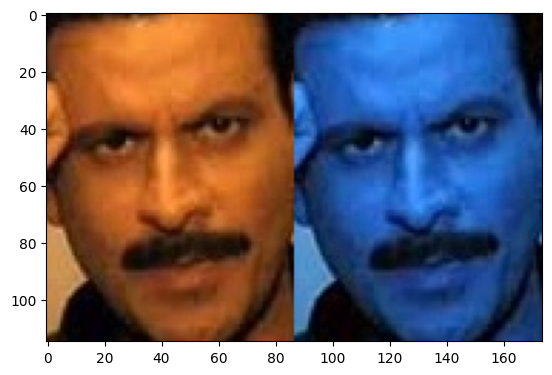

In [4]:
urls   = ["/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/manoj_bajpayee/0c6295032e.jpg"]

# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  # The io module needs to be accessed within the same scope as it's usage
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  # Resize image_2 to have the same dimensions as image
  image_2 = cv.resize(image_2, (image.shape[1], image.shape[0]))

  # Concatenate the images horizontally
  final_frame = cv.hconcat([image , image_2])
  #final_frame = cv.hconcat((  image , image_2, (224,224)))
  plt.imshow(final_frame)

  plt.show()

In [5]:
print("image shape" , image.shape)

image shape (115, 87, 3)


CONVERT TO GRAY SCALE

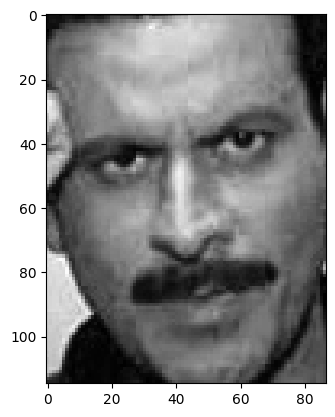

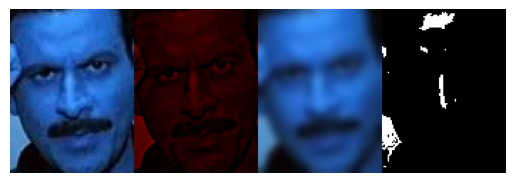

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io

# List of image URLs - Correct the path here, removing extra "/content/" and the single quote (') at the end
urls = ["/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/manoj_bajpayee/0c6295032e.jpg"]

# Loop over the image URLs
for url in urls:
    # Load the image
    image = io.imread(url)

    # Convert to RGB for consistent color format
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Create image_2 by converting image_rgb to a different color space or resizing it
    # For example, to convert to BGR:
    image_2 = cv.cvtColor(image_rgb, cv.COLOR_RGB2BGR)
    # or to resize:
    #image_2 = cv.resize(image_rgb, (new_width, new_height))

    # Apply blur
    blurred = cv.GaussianBlur(image_rgb, (15, 15), 0)  # 15x15 kernel for strong blur

    red_scale = image_rgb.copy()
    red_scale[:, :, 1] = 0  # Set green channel to 0
    red_scale[:, :, 2] = 0  # Set blue channel to 0

    # Convert to black and white
    gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)  # Convert to grayscale
    _, black_and_white = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)  # Apply threshold

    gray_image_2 = cv.cvtColor(image_2, cv.COLOR_BGR2GRAY) # image_2 is now defined.
    plt.imshow(gray_image_2, cmap='gray')
    plt.show()
    #cv.waitKey(0)  # Wait for a key press - commented out as it is not needed in a notebook environment
    #cv.destroyAllWindows()  # Close the display window - commented out as it is not needed in a notebook environment

    # Concatenate all transformations horizontally
    final_frame = cv.hconcat([image_rgb, red_scale ,blurred, cv.cvtColor(black_and_white, cv.COLOR_GRAY2RGB)])

    # Display the final frame
    plt.imshow(final_frame)
    plt.axis('off')  # Turn off axes for clean display
    plt.show()



Preprocessing Function

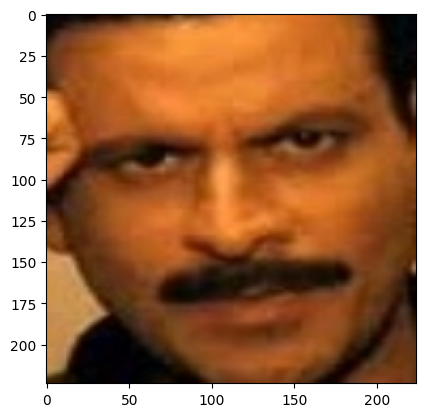

In [7]:

import tensorflow as tf
import matplotlib.pyplot as plt

#normalize pixel values to improve model training.
def preprocess(file_path):
    # Read in the image
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)

    # Resize and normalize the image
    img = tf.image.resize(img, (224, 224))  # Resize to 224x224, a standard size for CNNs
    img = img / 255.0  # Normalize to [0, 1] range
    return img
    # Test preprocessing function
#img = preprocess('/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/') # This line needs to be corrected - It's pointing to a directory, not an image file
img = preprocess('/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/manoj_bajpayee/0c6295032e.jpg') # Corrected to point to an image file
plt.imshow(img.numpy())
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directory path to dataset
data_dir = '/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/'

# Initialize ImageDataGenerator with normalization and validation split
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Training data generator
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data generator
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 436 images belonging to 12 classes.
Found 104 images belonging to 12 classes.


Preprocessing - Scale and Resize

In [9]:
import tensorflow as tf

def preprocess(file_path):

    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img

In [10]:
img = preprocess('/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/manoj_bajpayee/0c6295032e.jpg')

In [11]:
img.numpy().max()

0.9997059

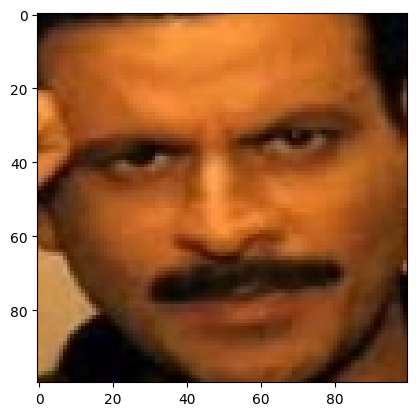

In [12]:
plt.imshow(img)

Apply Preprocessing and Save Images

In [13]:

import cv2
import os
import numpy as np

# Define the base directory and the directory to store processed images
base_dir = '/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/'  # Replace with your base directory
processed_dir = '/content/drive/MyDrive/visionary/processed_images'  # Replace with your desired output directory

def preprocess_image(file_path, size=(224, 224), grayscale=False):
    """
    Preprocesses an image by resizing and optionally converting to grayscale.

    Args:
        file_path (str): Path to the image file.
        size (tuple): Target size for resizing (width, height).
        grayscale (bool): Whether to convert the image to grayscale.

    Returns:
        numpy.ndarray: The preprocessed image.
    """
    # Load the image
    img = cv2.imread(file_path)

    # Check if image loading was successful
    if img is None:
        print(f"Error: Could not load image from {file_path}")
        return None  # Or handle the error in a way that suits your needs

    # Convert to grayscale if specified
    if grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize image
    img = cv2.resize(img, size)

    # Normalize pixel values to the range [0, 1]
    img = img / 255.0  # Assuming pixel values are in the range [0, 255]

    return img

# Iterate through the images in the base directory
for subdir, dirs, files in os.walk(base_dir):
    for file in files:
        file_path = os.path.join(subdir, file)

        # Process only if the file is an image
        if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            processed_img = preprocess_image(file_path, grayscale=True)  # Set grayscale=True if needed

            # Check if preprocessing was successful
            if processed_img is not None:
                # Save the processed image
                output_path = os.path.join(processed_dir, os.path.relpath(file_path, base_dir))
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                cv2.imwrite(output_path, (processed_img * 255).astype(np.uint8))  # Convert back to 0-255 range for saving

Data Augmented


Generating 1 augmented image for: 0b3ef4dd5e.jpg


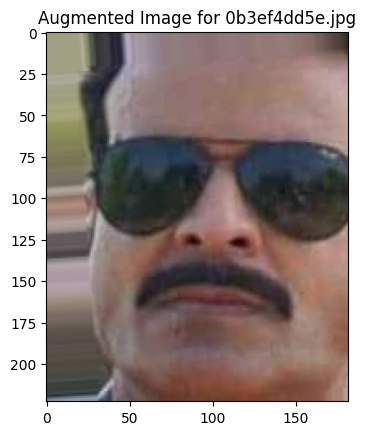

Augmentation complete for 0b3ef4dd5e.jpg
Generating 1 augmented image for: 376b13bda5.jpg


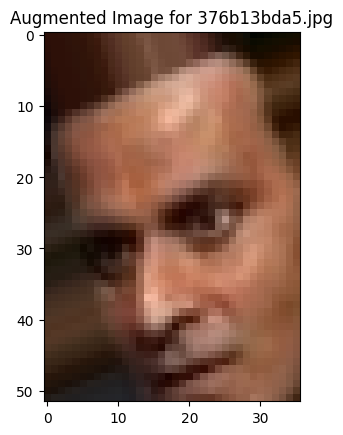

Augmentation complete for 376b13bda5.jpg
Generating 1 augmented image for: 072e31739e.jpg


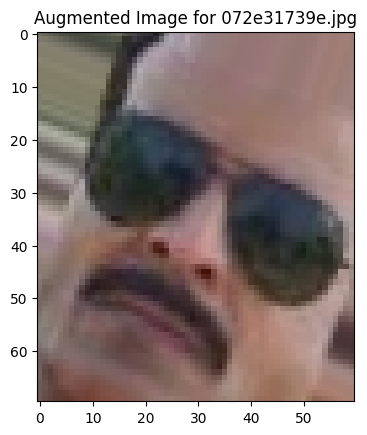

Augmentation complete for 072e31739e.jpg
Generating 1 augmented image for: 08a8989936.jpg


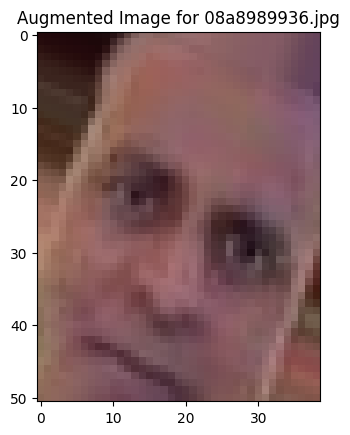

Augmentation complete for 08a8989936.jpg
Generating 1 augmented image for: 0c6295032e.jpg


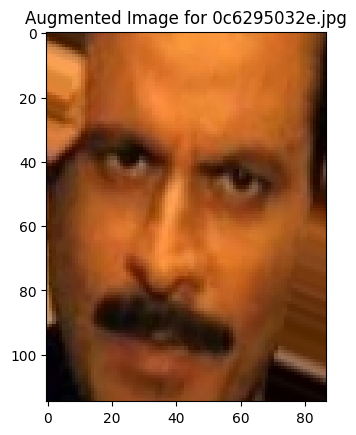

Augmentation complete for 0c6295032e.jpg
Generating 1 augmented image for: 13f6a5ae5b.jpg


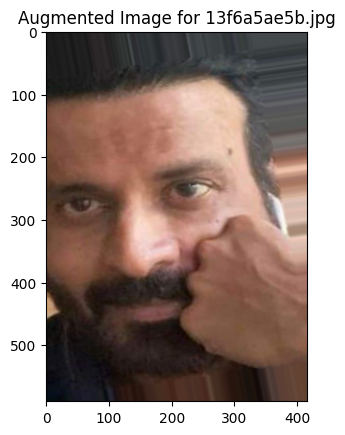

Augmentation complete for 13f6a5ae5b.jpg
Generating 1 augmented image for: 043d9d6ed9.jpg


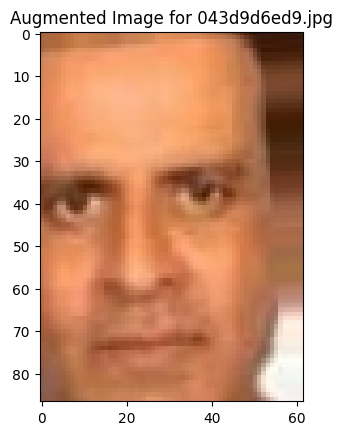

Augmentation complete for 043d9d6ed9.jpg
Generating 1 augmented image for: 0b5cf69aa3.jpg


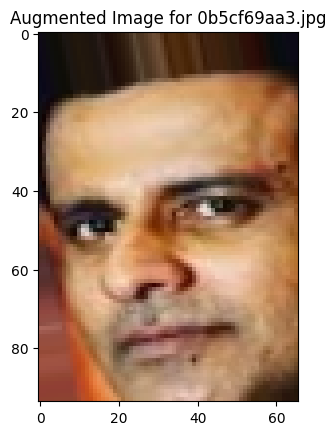

Augmentation complete for 0b5cf69aa3.jpg
Generating 1 augmented image for: 10c1f17c71.jpg


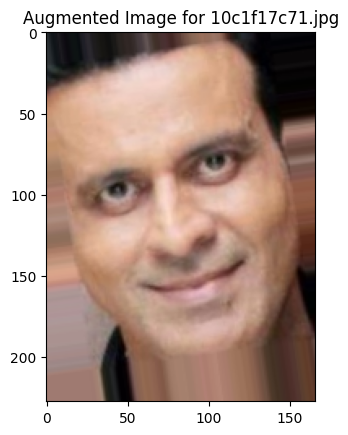

Augmentation complete for 10c1f17c71.jpg
Generating 1 augmented image for: 0b15403df7.jpg


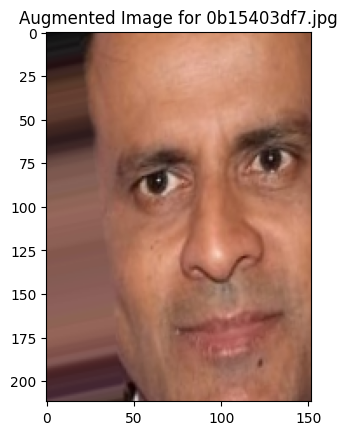

Augmentation complete for 0b15403df7.jpg
Generating 1 augmented image for: 123ddec253.jpg


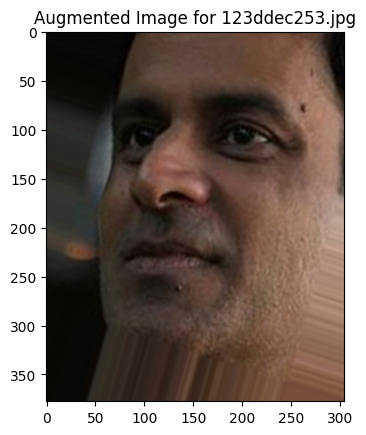

Augmentation complete for 123ddec253.jpg
Generating 1 augmented image for: 04d0bc4dc5.jpg


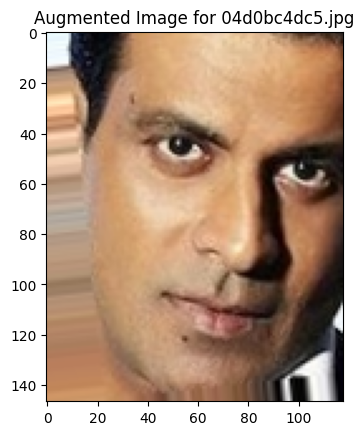

Augmentation complete for 04d0bc4dc5.jpg
Generating 1 augmented image for: 0ff29c2b52.jpg


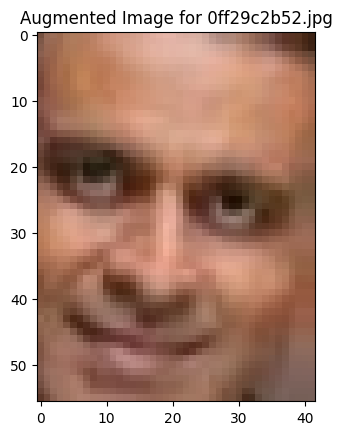

Augmentation complete for 0ff29c2b52.jpg
Generating 1 augmented image for: 0f5361f3dc.jpg


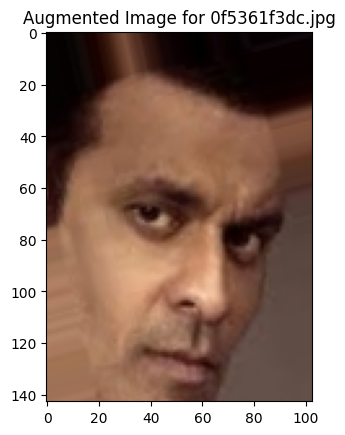

Augmentation complete for 0f5361f3dc.jpg
Generating 1 augmented image for: 63af81c706.jpg


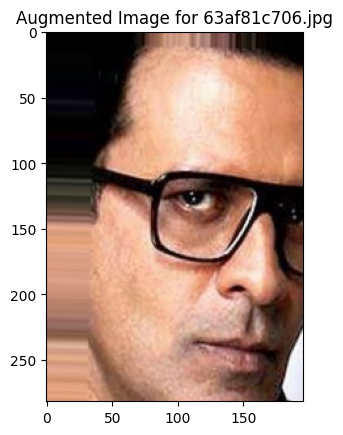

Augmentation complete for 63af81c706.jpg
Generating 1 augmented image for: 7f9e20540b.jpg


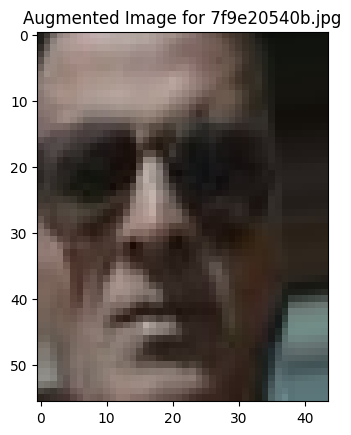

Augmentation complete for 7f9e20540b.jpg
Generating 1 augmented image for: 557c5c847f.jpg


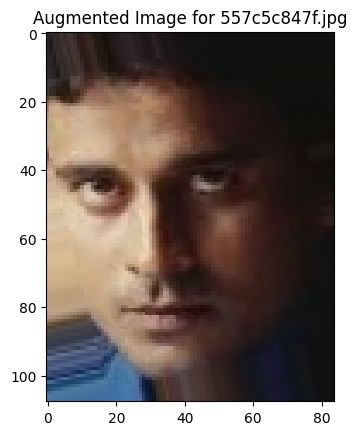

Augmentation complete for 557c5c847f.jpg
Generating 1 augmented image for: 3d61403f62.jpg


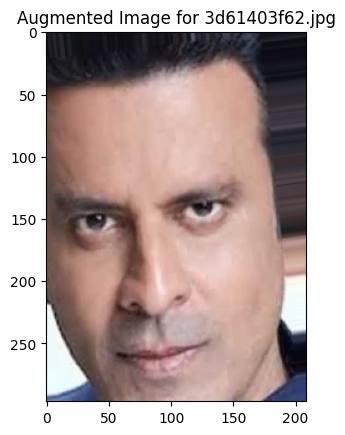

Augmentation complete for 3d61403f62.jpg
Generating 1 augmented image for: 507c39e267.jpg


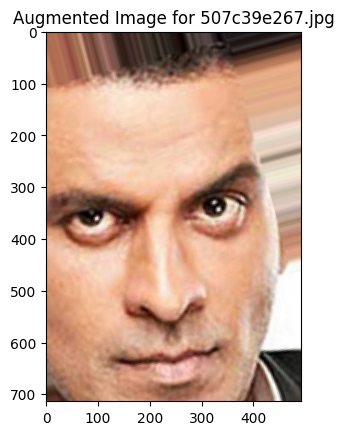

Augmentation complete for 507c39e267.jpg
Generating 1 augmented image for: 655eabe9ed.jpg


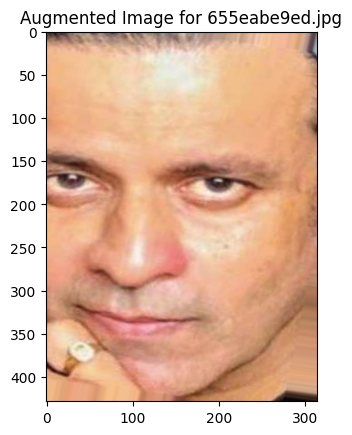

Augmentation complete for 655eabe9ed.jpg
Generating 1 augmented image for: 927a6a3a80.jpg


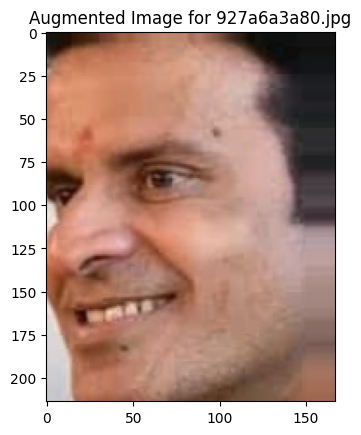

Augmentation complete for 927a6a3a80.jpg
Generating 1 augmented image for: 461eec1a3e.jpg


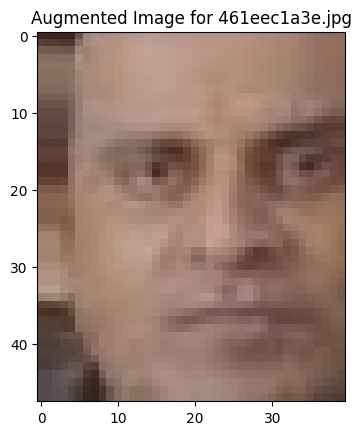

Augmentation complete for 461eec1a3e.jpg
Generating 1 augmented image for: 460b90bd2c.jpg


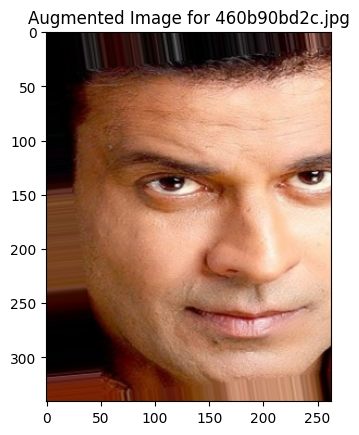

Augmentation complete for 460b90bd2c.jpg
Generating 1 augmented image for: 6e590b944b.jpg


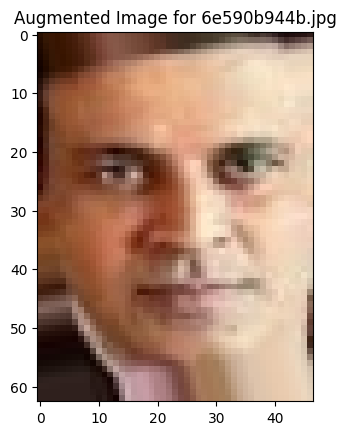

Augmentation complete for 6e590b944b.jpg
Generating 1 augmented image for: 44a8cfbe2b.jpg


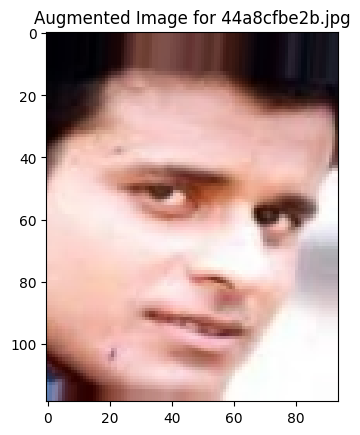

Augmentation complete for 44a8cfbe2b.jpg
Generating 1 augmented image for: 74a7533938.jpg


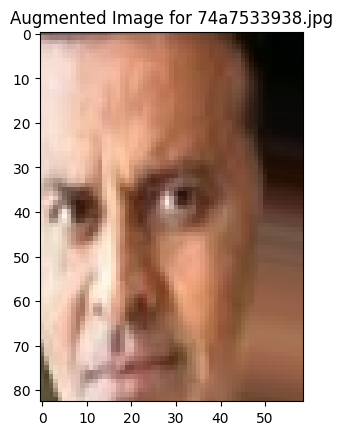

Augmentation complete for 74a7533938.jpg
Generating 1 augmented image for: 7d425228bc.jpg


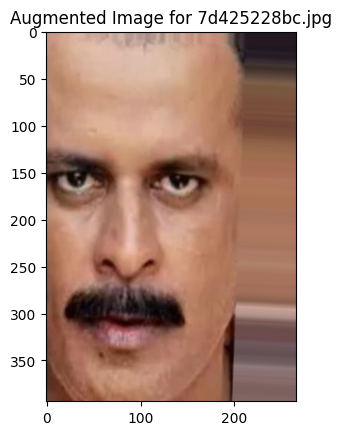

Augmentation complete for 7d425228bc.jpg
Generating 1 augmented image for: 92bf382cfe.jpg


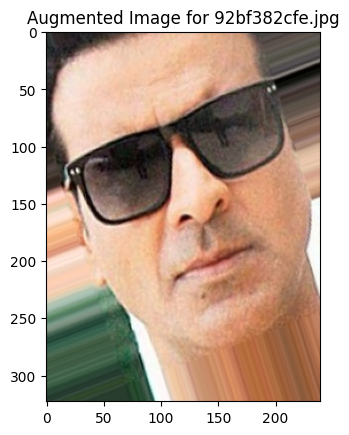

Augmentation complete for 92bf382cfe.jpg
Generating 1 augmented image for: 3d8aeaa076.jpg


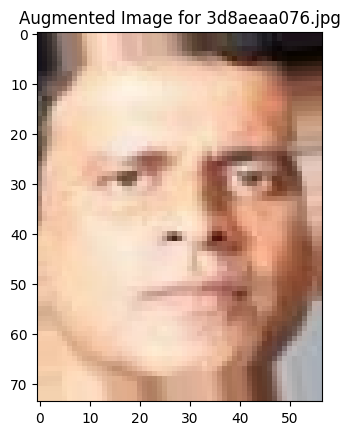

Augmentation complete for 3d8aeaa076.jpg
Generating 1 augmented image for: 437b7578a3.jpg


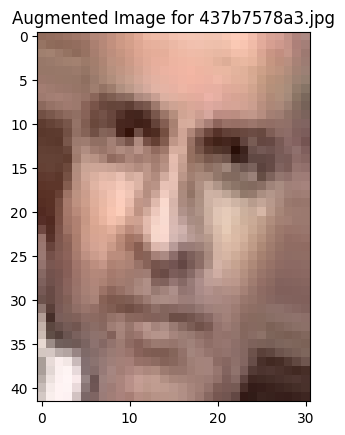

Augmentation complete for 437b7578a3.jpg
Generating 1 augmented image for: 7d16923f42.jpg


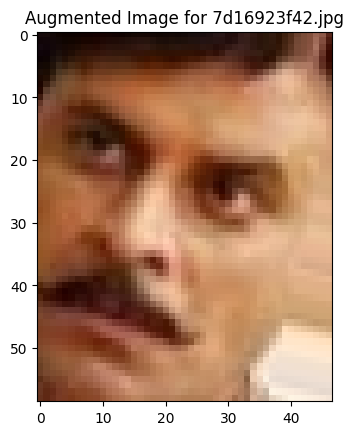

Augmentation complete for 7d16923f42.jpg
Generating 1 augmented image for: 721b771ce7.jpg


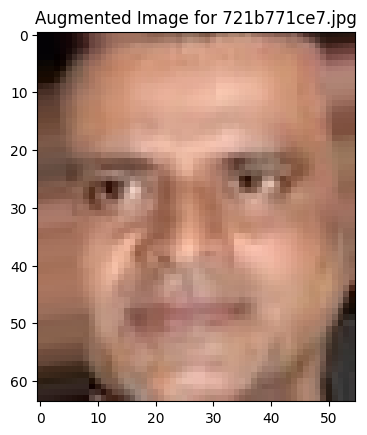

Augmentation complete for 721b771ce7.jpg
Generating 1 augmented image for: 748c609d77.jpg


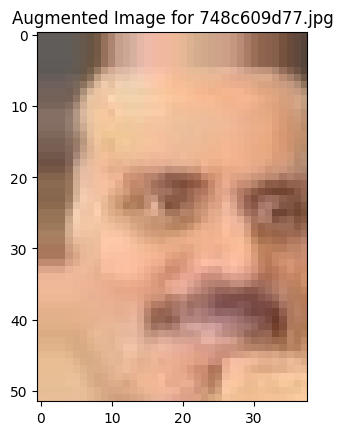

Augmentation complete for 748c609d77.jpg
Generating 1 augmented image for: 5e978dc09b.jpg


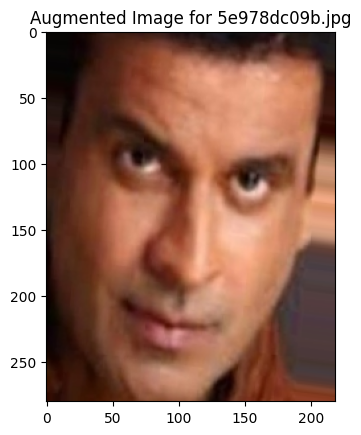

Augmentation complete for 5e978dc09b.jpg
Generating 1 augmented image for: 81c58ce248.jpg


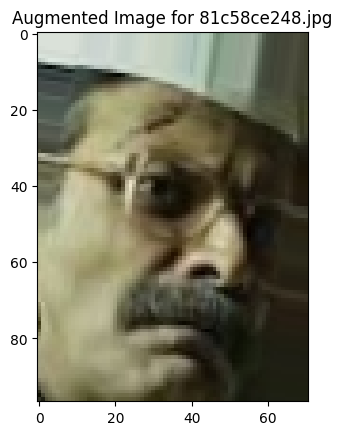

Augmentation complete for 81c58ce248.jpg
Generating 1 augmented image for: 39f0bc4088.jpg


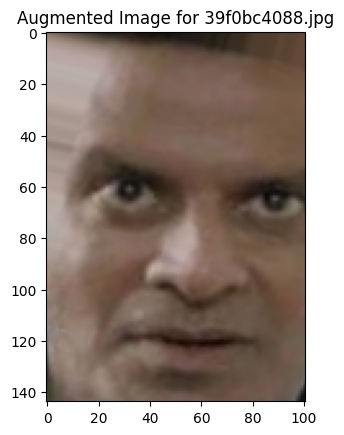

Augmentation complete for 39f0bc4088.jpg
Generating 1 augmented image for: 6aab09e237.jpg


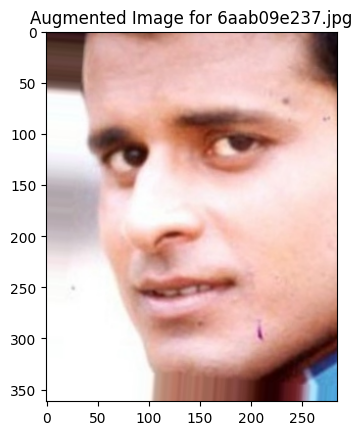

Augmentation complete for 6aab09e237.jpg
Generating 1 augmented image for: 4ab52e835f.jpg


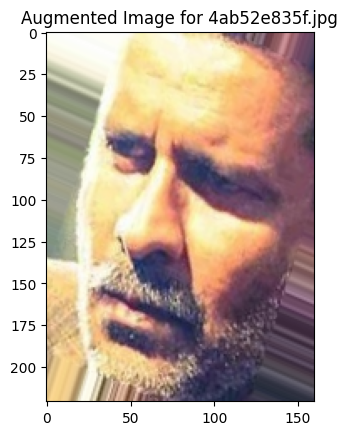

Augmentation complete for 4ab52e835f.jpg
Generating 1 augmented image for: 851ee56a6c.jpg


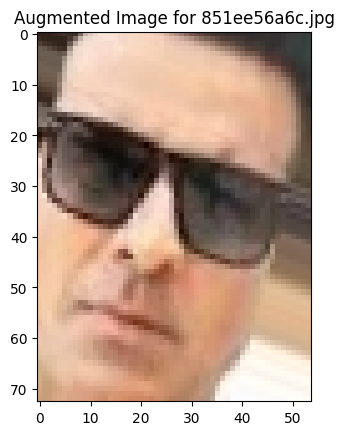

Augmentation complete for 851ee56a6c.jpg
Generating 1 augmented image for: 78eb605e6d.jpg


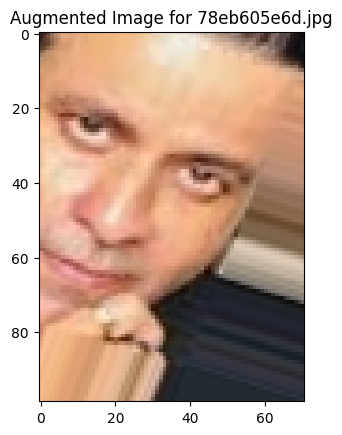

Augmentation complete for 78eb605e6d.jpg
Generating 1 augmented image for: 45b1a3ab9e.jpg


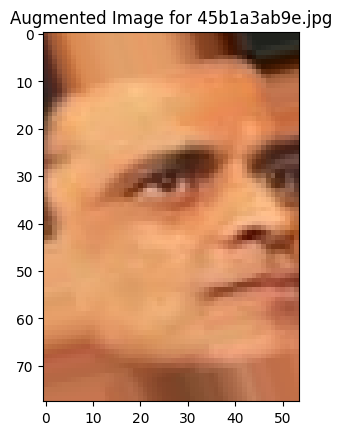

Augmentation complete for 45b1a3ab9e.jpg
Generating 1 augmented image for: 7c1ceebbd6.jpg


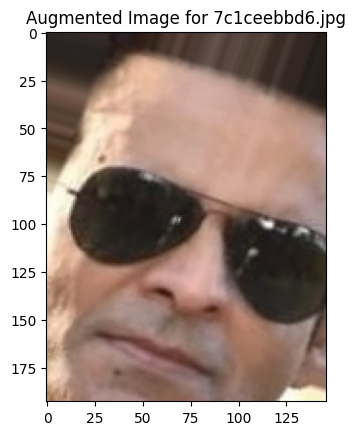

Augmentation complete for 7c1ceebbd6.jpg
Generating 1 augmented image for: 9f4bf39fd1.jpg


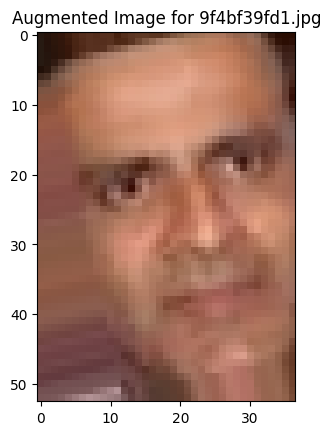

Augmentation complete for 9f4bf39fd1.jpg
Generating 1 augmented image for: 9c2c15cebd.jpg


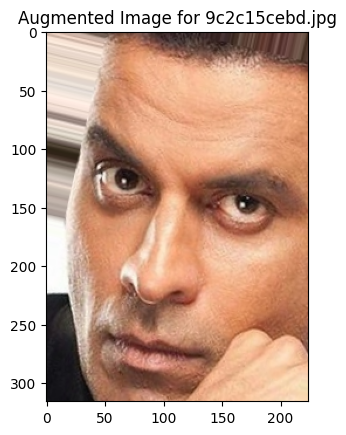

Augmentation complete for 9c2c15cebd.jpg
Generating 1 augmented image for: 9e6cda1bf5.jpg


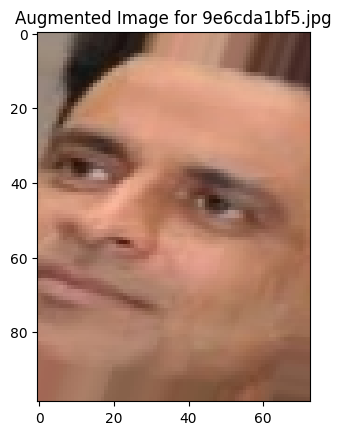

Augmentation complete for 9e6cda1bf5.jpg
Generating 1 augmented image for: 9fdaef0b97.jpg


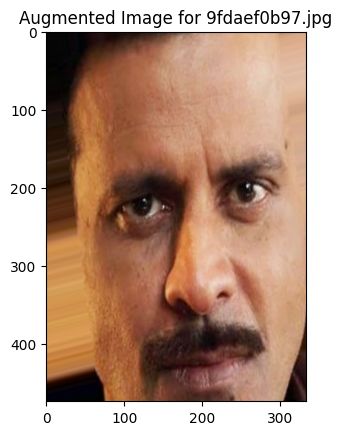

Augmentation complete for 9fdaef0b97.jpg


In [14]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt

def augment_images_minimal(folder_path, output_dir):
    """
    Augments each image in a folder by generating exactly 1 augmented image per original image.

    Args:
        folder_path (str): Path to the folder containing images.
        output_dir (str): Directory to save the augmented images.
    """

    # Create an ImageDataGenerator with augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Loop over each image in the folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)

        # Only process if the file is an image
        if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        # Load the image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not load image from {image_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure RGB format
        x = np.expand_dims(img, axis=0)  # Add batch dimension

        # Generate only 1 augmented image
        print(f"Generating 1 augmented image for: {file_name}")
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir,
                                  save_prefix=os.path.splitext(file_name)[0], save_format='jpg'):
            augmented_img = batch[0].astype('uint8')  # Convert to uint8 for display

            # Display the augmented image (optional)
            plt.imshow(augmented_img)
            plt.title(f"Augmented Image for {file_name}")
            plt.show()

            break  # Stop after 1 augmented image
        print(f"Augmentation complete for {file_name}")

# Example usage (replace with your actual paths)
folder_path = '/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/manoj_bajpayee'  # Path to folder with images of one person
output_dir = '/content/drive/MyDrive/visionary_project/Augmented_Dataset'  # Output directory for augmented images

os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist
augment_images_minimal(folder_path, output_dir)  # Generate 1 augmented image per image





CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2



Load Data

Found 540 files belonging to 12 classes.


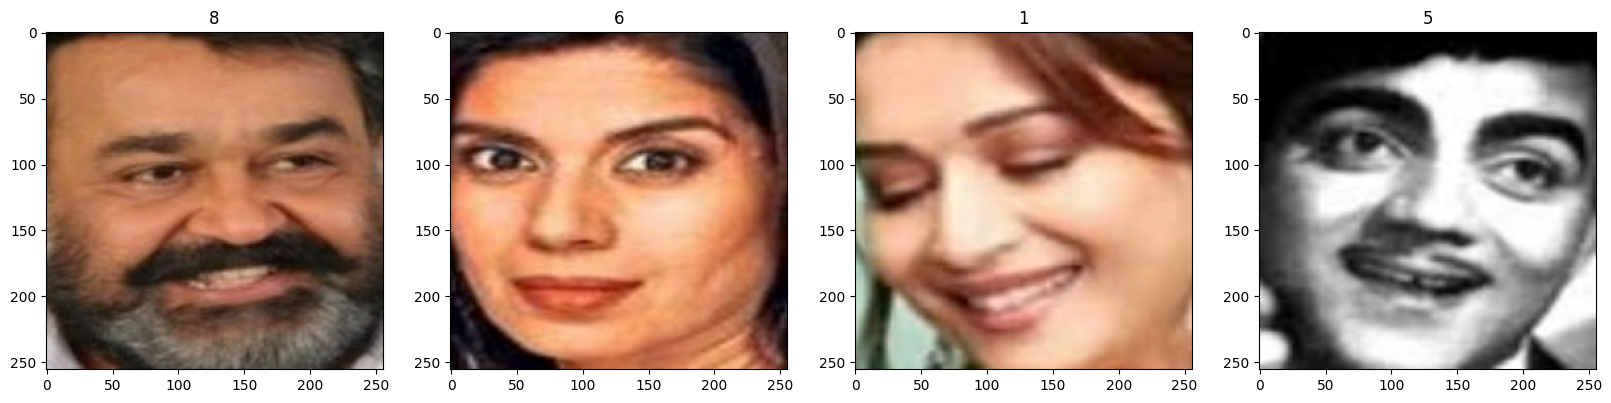

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Update the path to your actual data directory
data_dir = '/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/' # Replace with the correct path

# Load the dataset from the directory
# This automatically organizes the dataset based on the subfolder names (used as class labels)
data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Convert the dataset into a NumPy iterator
# This allows easier manipulation and direct access to images and labels
data_iterator = data.as_numpy_iterator()

# Fetch the next batch of images and their labels from the iterator
batch = data_iterator.next()

# Create a figure with 4 subplots for visualization
# ncols=4: Creates 4 columns of subplots
# figsize=(20, 20): Sets the overall size of the figure
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Limit the loop to the number of subplots
# Loop through the first 4 images in the batch (previously [:6], now limited to [:4])
for idx, img in enumerate(batch[0][:4]):
    # Display the image in the subplot
    ax[idx].imshow(img.astype(int))  # Convert the image to an integer format for proper display

    # Set the title of the subplot to the corresponding class label
    # batch[1] contains the labels for the images
    ax[idx].title.set_text(batch[1][idx])

# Display the figure with the subplots
plt.show()

Scale Data

In [ ]:
import tensorflow as tf # Importing the TensorFlow library
data_dir = '/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/' # Replace with the correct path

data = tf.keras.utils.image_dataset_from_directory(data_dir)
data = data.map(lambda x,y: (x/255, y))  # Scaling the Image Data,Scaling to [0, 1]
data.as_numpy_iterator().next() # Retrieving a  batch of data

Found 540 files belonging to 12 classes.


(array([[[[1.80392161e-01, 2.54901975e-01, 2.47058824e-01],
          [9.07475501e-02, 1.65257350e-01, 1.57414213e-01],
          [1.01868873e-02, 8.07904378e-02, 7.45098069e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[3.15739900e-01, 3.90249699e-01, 3.82406563e-01],
          [2.10659757e-01, 2.85169572e-01, 2.77326435e-01],
          [9.67521816e-02, 1.67355731e-01, 1.61075100e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[3.64276975e-01, 4.38786775e-01, 4.30943638e-01],
          [3.04301649e-01, 3.78811479e-01, 3.70968342e-01],
          [2.22195461e-01, 2.92799026e-01, 2.86518395e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

Split Data

In [ ]:
train_size = int(len(data)*.7) #Training Set (train_size): 70% of the total data (used to train the model).
val_size = int(len(data)*.2) #Validation Set (val_size): 20% of the total data
test_size = int(len(data)*.1) #Testing Set (test_size): 10% of the total data
train_size
#val_size
#print(len(data))  # Should output 16


11

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()  #Model Initialization

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))    #ReLU (Rectified Linear Unit)
model.add(MaxPooling2D())             #Reduces the spatial dimensions (height and width) by half while retaining the most important features.
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())           #MaxPooling2D: Reduce spatial dimensions, retaining important features while reducing computational cost.
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())            #Flatten: Convert 3D feature maps to 1D for input to dense layers.
model.add(Dense(256, activation='relu'))         #Dense: Learn global patterns and make predictions.
model.add(Dense(1, activation='sigmoid'))        #Sigmoid Output: Maps predictions to a probability between 0 and 1 for binary classification.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])  # Adam optimizer is an extension of gradient descent

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [ ]:
import tensorflow as tf
import numpy as np

# 1. Load or Create Training and Validation Data
X_train = np.random.rand(100, 256, 256, 3)  # Replace with real data
y_train = np.random.randint(0, 2, size=100)
X_val = np.random.rand(20, 256, 256, 3)
y_val = np.random.randint(0, 2, size=20)

# 2. Create TensorFlow datasets
train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(8)
val = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(8)

# 3. Define Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# 4. Define Optimizer with Custom Learning Rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# 5. Compile Model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 6. TensorBoard Callback
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# 7. Train the Model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 946ms/step - accuracy: 0.5842 - loss: 2.8708 - val_accuracy: 0.5500 - val_loss: 0.7009
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 850ms/step - accuracy: 0.4449 - loss: 0.7197 - val_accuracy: 0.4500 - val_loss: 0.6939
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 949ms/step - accuracy: 0.6068 - loss: 0.6831 - val_accuracy: 0.5500 - val_loss: 0.6895
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 800ms/step - accuracy: 0.5776 - loss: 0.6859 - val_accuracy: 0.5500 - val_loss: 0.6922
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 882ms/step - accuracy: 0.5776 - loss: 0.6853 - val_accuracy: 0.5500 - val_loss: 0.6899
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 925ms/step - accuracy: 0.5776 - loss: 0.6786 - val_accuracy: 0.4500 - val_loss: 0.6971
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 928ms/step - accuracy: 0.6080 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6969
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 952ms/step - accuracy: 0.6660 - loss: 0.6674 - val_accu

Plot Performance

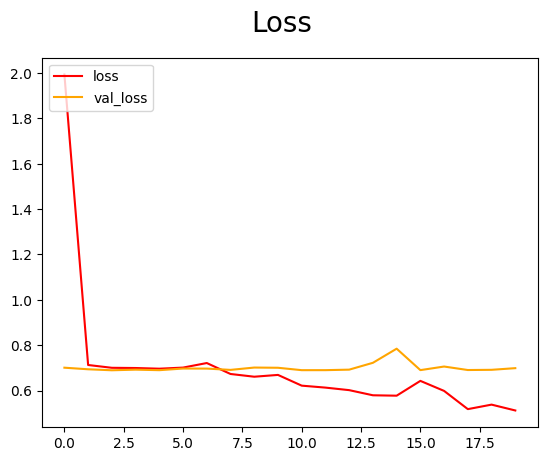

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as plt

fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

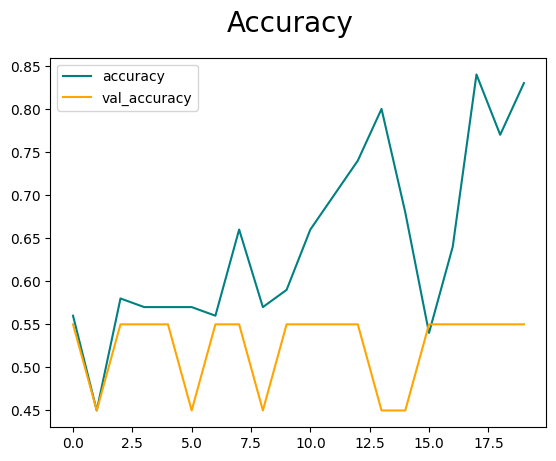

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

 Evaluate

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming you have a test dataset similar to train and validation
X_test = np.random.rand(20, 256, 256, 3)    # Example test data with 20 samples
y_test = np.random.randint(0, 2, size=20)    # Example test labels (0 or 1)

# Create TensorFlow dataset for testing
test = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Now you can evaluate the model
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.5500 - loss: 0.6996
Test Loss: 0.6995671391487122
Test Accuracy: 0.550000011920929


Test

Selected image: /content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/madhavan/4857c451df.jpg


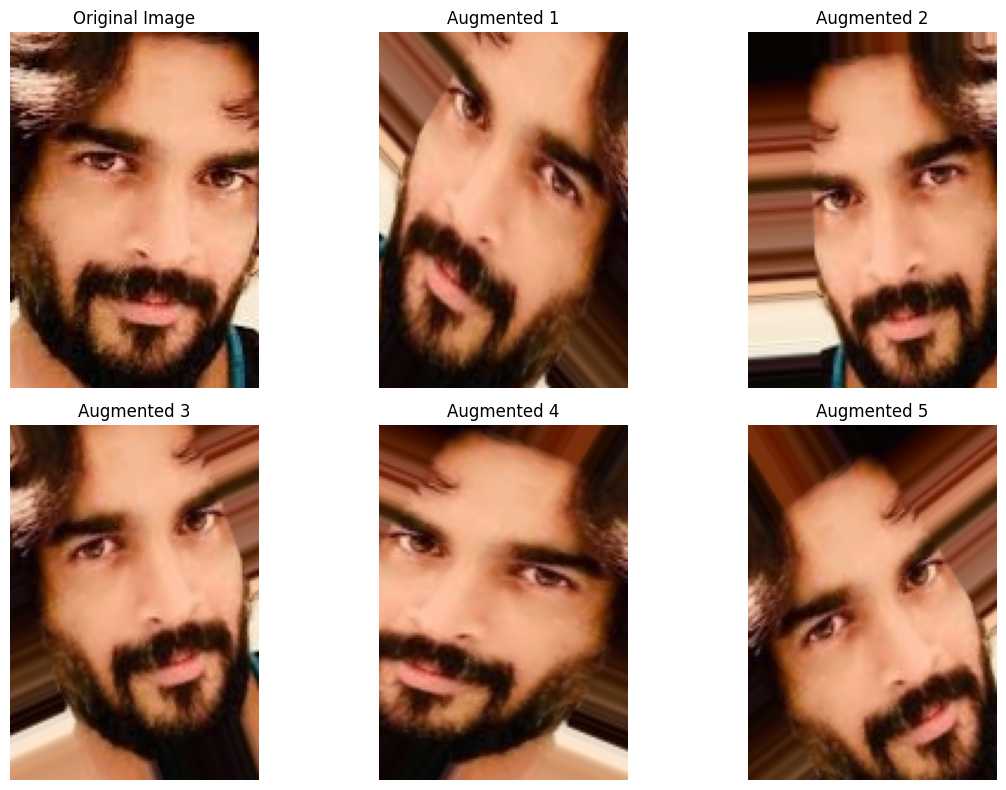

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

# Define the directory containing the images
image_dir = "/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/madhavan"

# List all files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select a random image
    image_file = np.random.choice(image_files)
    image_path = os.path.join(image_dir, image_file)
    print(f"Selected image: {image_path}")

    # Load the image
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for compatibility
        img_array = img_to_array(img)              # Convert to array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Initialize the ImageDataGenerator
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        # Generate augmented images
        aug_iter = train_datagen.flow(img_array, batch_size=1)

        # Plot original image and augmented versions
        fig, axes = plt.subplots(2, 3, figsize=(12, 8))

        # Display original image
        axes[0, 0].imshow(img / 255)  # Normalize for Matplotlib
        axes[0, 0].set_title("Original Image")
        axes[0, 0].axis('off')

        # Generate and display augmented images
        for i in range(1, 6):  # Start from index 1 because 0 is for the original image
            augmented_img = next(aug_iter)  # Get the next augmented image
            axes[i // 3, i % 3].imshow(augmented_img[0])  # Use [0] to get the image from the batch
            axes[i // 3, i % 3].set_title(f"Augmented {i}")
            axes[i // 3, i % 3].axis('off')

        plt.tight_layout()
        plt.show()

    else:
        print(f"Error: Could not load the selected image file: {image_path}")

else:
    print(f"Error: No images found in the directory: {image_dir}")



Image Resizing and Prediction

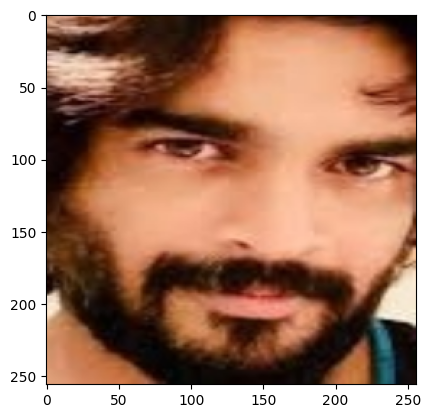

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class is Happy


In [ ]:
import tensorflow as tf # Import tensorflow at the beginning of the cell
import matplotlib.pyplot as plt
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')



In [ ]:
# Save the model in the HDF5 format
model.save('cnn_model.h5')

# OR save in the native Keras format
model.save('cnn_model.keras')

# OR to export the model, you can use this
model.export('cnn_model') #Make sure you import tf.saved_model


Saved artifact at 'cnn_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_54')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135605416701344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135605416755616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135605417085232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135605417179824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135605417173664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135605417264928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135605417271616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135605416762304: TensorSpec(shape=(), dtype=tf.resource, name=None)


 Batch Testing

In [ ]:
import os

# Replace '/path/to/test/images' with the actual path to your test images directory
test_images_dir = '/content/drive/MyDrive/visionary/archive (5)/actors_dataset/Indian_actors_faces/madhavan'  # Example: Using a subfolder from your dataset
results = []

for image_file in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, image_file)
    img = cv2.imread(img_path)
    if img is not None:
        img_resized = tf.image.resize(img, (256, 256))
        yhat = model.predict(np.expand_dims(img_resized / 255.0, 0))
        label = 'Sad' if yhat > 0.5 else 'Happy'
        results.append((image_file, label))
    else:
        print(f"Error loading image: {image_file}")

# Display results
for file, label in results:
    print(f"{file}: Predicted class is {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━